In [1]:
import math
import numpy as np
import TOVsolver.main as main
import matplotlib.pyplot as plt
from scipy.integrate import ode
import EOSgenerators.Polytrope_EOS as Polytrope
import EOSgenerators.crust_EOS as crust
from TOVsolver.unit import km,Msun,MeV,fm,g_cm_3,dyn_cm_2,G,c

In [3]:
Tolos_crust_out = np.loadtxt("Tolos_crust_out.txt")
eps_crust_T_out = Tolos_crust_out[:,3] * g_cm_3
pres_crust_T_out = Tolos_crust_out[:,4] * dyn_cm_2

In [5]:
print(Tolos_crust_out)

[[6.2203e-12 2.6000e+01 5.6000e+01 1.0317e+04 9.5393e+18 1.7970e+00]
 [6.3129e-11 2.6000e+01 5.6000e+01 1.0471e+05 5.3379e+20 1.6880e+00]
 [6.3046e-10 2.6000e+01 5.6000e+01 1.0457e+06 2.3241e+22 1.5860e+00]
 [4.9516e-09 2.6000e+01 5.6000e+01 8.2138e+06 5.4155e+23 1.4700e+00]
 [6.3067e-09 2.8000e+01 6.2000e+01 1.0462e+07 7.3908e+23 1.4590e+00]
 [2.5110e-08 2.8000e+01 6.2000e+01 4.1659e+07 5.3113e+24 1.4000e+00]
 [7.9402e-08 2.8000e+01 6.2000e+01 1.3176e+08 2.6112e+25 1.3690e+00]
 [1.5828e-07 2.8000e+01 6.2000e+01 2.6269e+08 6.6859e+25 1.3580e+00]
 [1.6400e-07 2.6000e+01 5.8000e+01 2.7220e+08 6.9610e+25 1.3570e+00]
 [1.7778e-07 2.8000e+01 6.4000e+01 2.9508e+08 7.4978e+25 1.3560e+00]
 [3.1622e-07 2.8000e+01 6.4000e+01 5.2496e+08 1.6340e+26 1.3500e+00]
 [5.0116e-07 2.8000e+01 6.4000e+01 8.3212e+08 3.0390e+26 1.3450e+00]
 [7.9431e-07 2.8000e+01 6.4000e+01 1.3191e+09 5.6433e+26 1.3430e+00]
 [8.5093e-07 2.8000e+01 6.6000e+01 1.4132e+09 5.9393e+26 1.3420e+00]
 [9.2239e-07 2.8000e+01 6.6000e+01

In [7]:
print(eps_crust_T_out)
print(pres_crust_T_out)

[2.94096142e-11 2.98486062e-10 2.98086978e-09 2.34142376e-08
 2.98229508e-08 1.18753040e-07 3.75594724e-07 7.48823452e-07
 7.75932634e-07 8.41154304e-07 1.49644965e-06 2.37203917e-06
 3.76022314e-06 4.02846436e-06 4.36683028e-06 4.73455735e-06
 5.96002921e-06 7.50391281e-06 8.80293008e-06 9.45001571e-06
 1.49804599e-05 2.37511782e-05 3.21689926e-05 3.59602872e-05
 4.74196891e-05 5.97114654e-05 7.87392036e-05 9.04152509e-05
 1.19234791e-04 1.50149521e-04 1.80354452e-04 1.98008202e-04
 2.79230276e-04 2.99882855e-04 3.62339446e-04 4.00081356e-04
 5.21630833e-04 5.72029396e-04 6.72284910e-04 7.45801819e-04
 8.08543469e-04 9.72395812e-04 1.15608831e-03 1.24630972e-03]
[3.02141162e-17 1.69068937e-15 7.36119289e-14 1.71526785e-12
 2.34091065e-12 1.68226427e-11 8.27053349e-11 2.11764552e-10
 2.20477878e-10 2.37480109e-10 5.17541809e-10 9.62551749e-10
 1.78741964e-09 1.88117262e-09 2.09617102e-09 2.27598037e-09
 3.09856779e-09 4.21825080e-09 5.22356152e-09 5.50133640e-09
 1.01864517e-08 1.88538

In [9]:
print(eps_crust_T_out[-1])
print(pres_crust_T_out[-1])

0.0012463097241917458
2.4572783742936653e-06


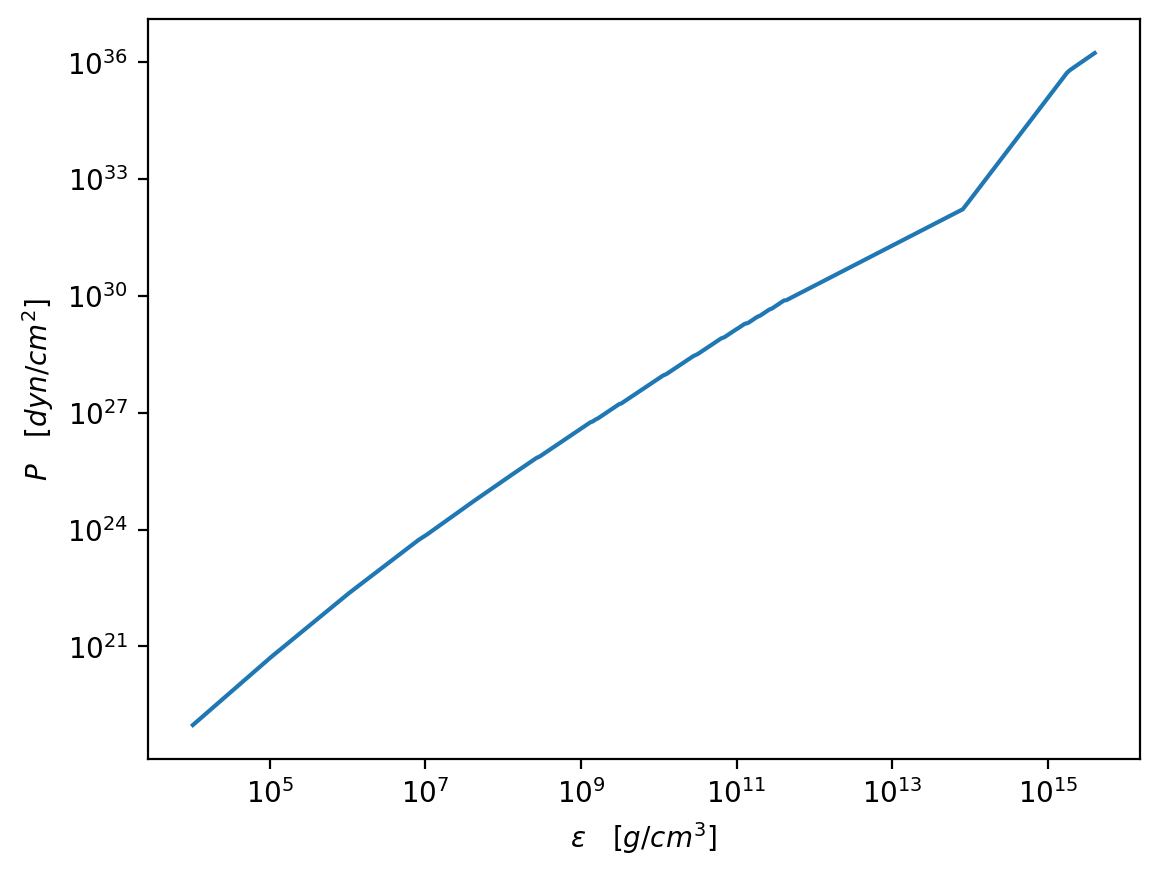

In [11]:
gammas=np.array([1.03,2.62,1.38])
rho_ts=np.array([8.087e13,1.8078e15])*g_cm_3
theta = np.append(gammas,rho_ts)

eps_set=np.logspace(11.7,15.6,100,base=10)*g_cm_3
pres_out=Polytrope.compute_EOS(eps_set,theta,eps_crust_T_out[-1],pres_crust_T_out[-1])

eps_total=np.hstack((eps_crust_T_out,eps_set))
pres_total=np.hstack((pres_crust_T_out,pres_out))

plt.figure(dpi=200)
plt.plot(eps_total/g_cm_3,pres_total/dyn_cm_2)

plt.xscale("log")
plt.yscale("log")

plt.xlabel(r"$\epsilon\quad[g/cm^3]$")
plt.ylabel(r"$P\quad[dyn/cm^2]$")

plt.show()


In [15]:
print(eps_total/g_cm_3)

[1.03170000e+04 1.04710000e+05 1.04570000e+06 8.21380000e+06
 1.04620000e+07 4.16590000e+07 1.31760000e+08 2.62690000e+08
 2.72200000e+08 2.95080000e+08 5.24960000e+08 8.32120000e+08
 1.31910000e+09 1.41320000e+09 1.53190000e+09 1.66090000e+09
 2.09080000e+09 2.63240000e+09 3.08810000e+09 3.31510000e+09
 5.25520000e+09 8.33200000e+09 1.12850000e+10 1.26150000e+10
 1.66350000e+10 2.09470000e+10 2.76220000e+10 3.17180000e+10
 4.18280000e+10 5.26730000e+10 6.32690000e+10 6.94620000e+10
 9.79550000e+10 1.05200000e+11 1.27110000e+11 1.40350000e+11
 1.82990000e+11 2.00670000e+11 2.35840000e+11 2.61630000e+11
 2.83640000e+11 3.41120000e+11 4.05560000e+11 4.37210000e+11
 5.01187234e+11 5.48774521e+11 6.00880180e+11 6.57933225e+11
 7.20403406e+11 7.88805077e+11 8.63701425e+11 9.45709117e+11
 1.03550337e+12 1.13382350e+12 1.24147905e+12 1.35935639e+12
 1.48842609e+12 1.62975083e+12 1.78449424e+12 1.95393040e+12
 2.13945438e+12 2.34259369e+12 2.56502091e+12 2.80856739e+12
 3.07523839e+12 3.367229

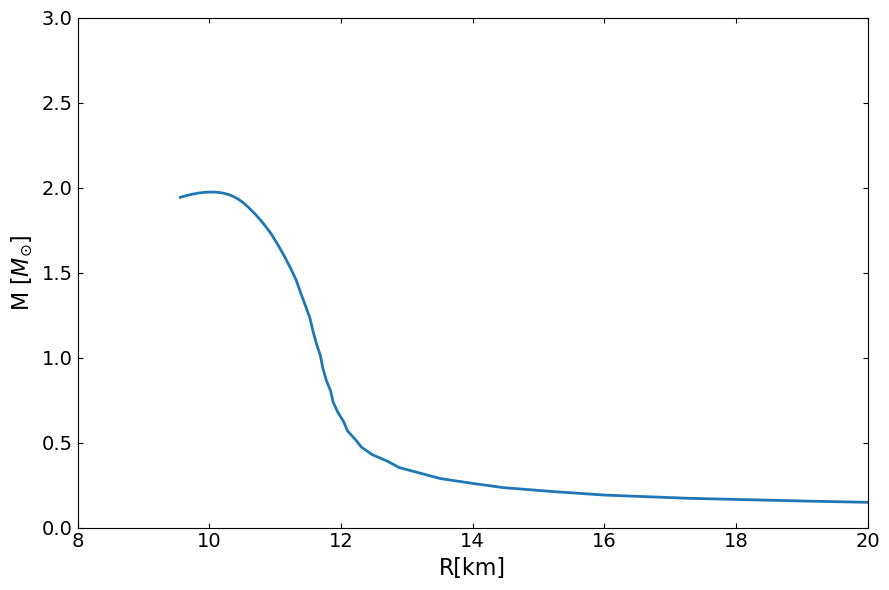

In [17]:
MR=main.OutputMR("",eps_total,pres_total)
fig,ax=plt.subplots(1,1,figsize=(9,6))
ax.plot(MR[:,1]/km,MR[:,0]/Msun,lw=2)
ax.set_ylabel(r"M [$M_{\odot}$]",fontsize=16)
ax.set_xlabel("R[km]",fontsize=16)
ax.set_xlim(8.0,20.0)
ax.set_ylim(0,3)
ax.tick_params(top=1,right=1,which="both",direction="in",labelsize=14)
ax.tick_params(top=1,right=1,which="both",direction="in",labelsize=14)
fig.tight_layout()
plt.show()